In [1]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'F:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data'
    ]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)

Using data path: /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set


In [2]:
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *

In [3]:
eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)

Successfully read 5269 paths from /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/eligible_dates.txt


In [4]:
print(f"Eligible dates loaded: {eligible_dates}")

Eligible dates loaded: ['/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000316.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000331.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000414.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20001218.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010102.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010104.csv.gz', '/Users/khang/Desktop/ma

In [5]:
import time

start_time = time.time()
daily_PnL = execute_trading_strategy(win_threshold=0.1,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

Day 64: PnL = [-0.02 -0.01  0.05]
Day 67: PnL = [ 0.02  0.   -0.01]
Day 70: PnL = [-0.13  0.07 -0.03]
Day 71: PnL = [0.3]
Day 72: PnL = [0.13]
Day 73: PnL = [0.14]
Day 74: PnL = [0.4]
Day 75: PnL = [0.12]
Day 77: PnL = [0.05 0.09]
Day 80: PnL = [-0.05 -0.09  0.11]
Day 83: PnL = [-0.18 -0.05 -0.04]
Day 86: PnL = [-0.08 -0.07  0.47]
Day 89: PnL = [-0.17  0.18  0.25]
Day 91: PnL = [0.08 0.02]
Day 92: PnL = [0.23]
Day 93: PnL = [0.3]
Day 96: PnL = [-0.13 -0.09 -0.06]
Day 99: PnL = [-0.07  0.06  0.01]
Day 101: PnL = [-0.01  0.22]
Day 104: PnL = [0.06 0.03 0.24]
Day 106: PnL = [0.09 0.14]
Day 109: PnL = [-0.18 -0.08 -0.12]
Day 112: PnL = [ 0.06  0.02 -0.19]
Day 115: PnL = [-0.01 -0.12 -0.48]
Day 116: PnL = [0.38]
Day 118: PnL = [0.03 0.11]
Day 119: PnL = [0.25]
Day 122: PnL = [-0.07  0.08  0.01]
Day 125: PnL = [-0.29 -0.01 -0.2 ]
Day 128: PnL = [-0.15 -0.16  0.06]
Day 129: PnL = [0.12]
Day 132: PnL = [ 0.02 -0.02  0.27]
Day 133: PnL = [0.11]
Day 134: PnL = [0.19]
Day 137: PnL = [-0.04 -0.01 

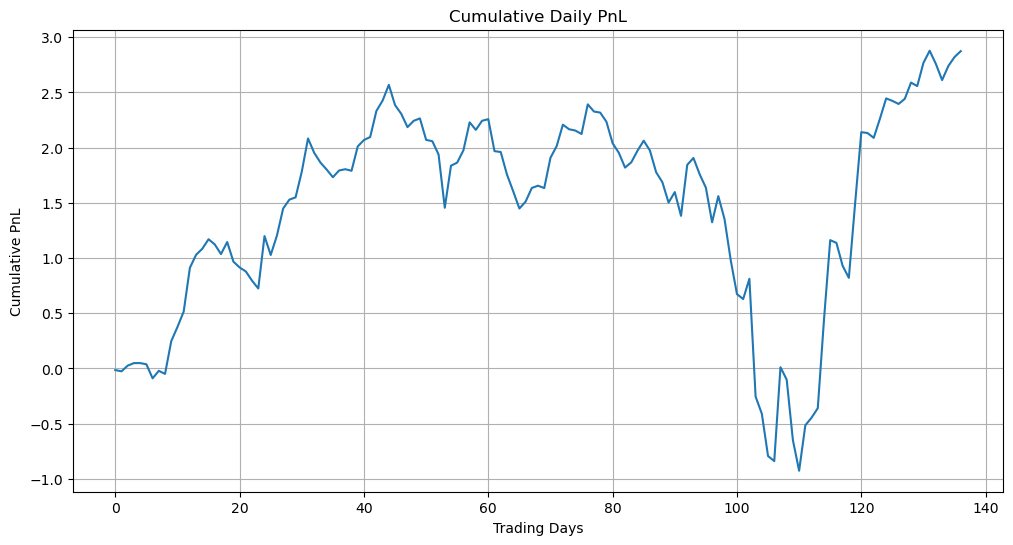

In [7]:
import matplotlib.pyplot as plt
cumulative_pnl = np.cumsum(daily_PnL)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()